In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
import os
os.chdir("/content/drive/My Drive/ML Practicals/data/")

In [132]:
!jupyter nbconvert --to html ../Lecture_Preprocessing_1.ipynb


[NbConvertApp] Converting notebook ../Lecture_Preprocessing_1.ipynb to html
[NbConvertApp] Writing 1030001 bytes to ../Lecture_Preprocessing_1.html


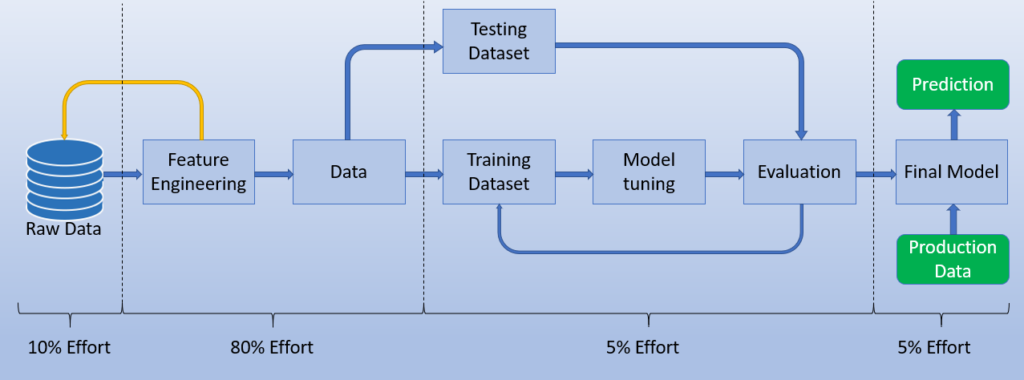

#Pre Processing includes many steps

- Domain Knowledge
- Data Cleaning
  - Handling Missing Values
  - Handling outliers
- Data Transformation
  - Feature Scaling
  - Encoding Categorical Data
- Feature Engineering
  - Creating New Features
  - Dimensionality Reduction
- Handling Imbalanced Data
- Handling Time Series Data
- Splitting Data

#Understanding Data

In [74]:
import pandas as pd
import numpy as np
df = pd.read_csv('titanic.csv')

##1. How big is the data?

In [75]:
df.shape

(891, 12)

##2. How does the data look like?


In [76]:
#df.head()
#df.tail()
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
529,530,0,2,"Hocking, Mr. Richard George",male,23.0,2,1,29104,11.5,NaN,S


##3. What is the data type of cols?


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##4. Are there any missing values?


In [78]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##5. How does the data look mathematically?


In [79]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##6. Are there duplicate values?


In [80]:
df.duplicated().sum()

0

##7. How is the correlation between cols?


In [81]:
df.corr()

<ipython-input-81-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


##Handling Missing Values

In [89]:
df= pd.read_csv("hired.csv")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


##Drop Values

In [90]:
t = df.dropna()
t
#inplace=True

,experience,test_score(out of 10),interview_score(out of 10),salary($)
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
7,eleven,7.0,8,80000


##Fill na

In [93]:
df= pd.read_csv("hired.csv")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [94]:
df["experience"] = df["experience"].fillna(df.experience.mode())
df


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,eleven,8.0,9,50000
1,five,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [95]:
df["test_score(out of 10)"] = df["test_score(out of 10)"].fillna(df["test_score(out of 10)"].mean())
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,eleven,8.000000,9,50000
1,five,8.000000,6,45000
2,five,6.000000,7,60000
3,two,10.000000,10,65000
4,seven,9.000000,6,70000
5,three,7.000000,10,62000
6,ten,7.857143,7,72000
7,eleven,7.000000,8,80000


##Using SKLEARN


In [96]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Without Column Transformer
## Instantiate SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

## Fit and transform the DataFrame
imputed_data = imputer.fit_transform(df)

In [97]:
df= pd.read_csv("hired.csv")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [99]:
imputer1 = SimpleImputer(strategy='most_frequent')
imputer2 = SimpleImputer(strategy='mean')

In [100]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['experience']),
    ('imputer2',imputer2,['test_score(out of 10)'])
],remainder='passthrough')

In [101]:
trf.fit(df)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['experience']),
                                ('imputer2', SimpleImputer(),
                                 ['test_score(out of 10)'])])

In [102]:
df = trf.transform(df)

In [103]:
df

array([['eleven', 8.0, 9, 50000],
       ['eleven', 8.0, 6, 45000],
       ['five', 6.0, 7, 60000],
       ['two', 10.0, 10, 65000],
       ['seven', 9.0, 6, 70000],
       ['three', 7.0, 10, 62000],
       ['ten', 7.857142857142857, 7, 72000],
       ['eleven', 7.0, 8, 80000]], dtype=object)

##You can also fill arbitary values.

In [ ]:
#imputer1 = SimpleImputer(strategy='constant',fill_value=99)

## How to handle Missing Categorical values

In [ ]:
df['experience'].fillna('Missing', inplace=True)


#Z-score normalization

In [104]:
purchase = pd.read_csv("online_purchase.csv")
purchase

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [105]:
purchase=purchase.iloc[:,2:4]

In [106]:
purchase.isna().sum()

Age                0
EstimatedSalary    0
dtype: int64

In [ ]:
#purchase.Age = purchase.Age.fillna(purchase.Age.mean())
#purchase.Income = purchase.Income.fillna(purchase.Income.mean())


In [107]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(purchase)

# transform train and test sets
purchase_scaled = scaler.transform(purchase)


In [108]:
type(purchase_scaled)

numpy.ndarray

In [109]:
purchase_scaled = pd.DataFrame(purchase_scaled, columns=purchase.columns)


In [110]:
np.round(purchase.describe(), 1)

,Age,EstimatedSalary
count,400.0,400.0
mean,37.7,69742.5
std,10.5,34097.0
min,18.0,15000.0
25%,29.8,43000.0
50%,37.0,70000.0
75%,46.0,88000.0
max,60.0,150000.0


In [111]:
np.round(purchase_scaled.describe(), 1)

,Age,EstimatedSalary
count,400.0,400.0
mean,-0.0,-0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.1,2.4


In [112]:
purchase.shape

(400, 2)

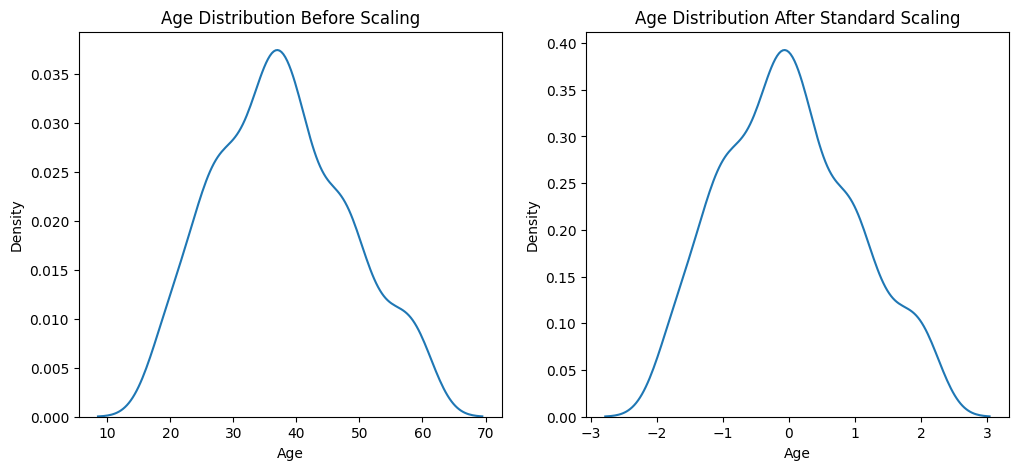

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(purchase['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(purchase_scaled['Age'], ax=ax2)
plt.show()

#Why scaling is required


In [116]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [117]:
original = pd.read_csv("online_purchase.csv")
original = original.iloc[:,2:]

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(original.drop('Purchased', axis=1),
                                                    original['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

In [119]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [120]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [121]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [122]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [123]:
from sklearn.metrics import accuracy_score
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


#Another Algorithm

In [124]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


#Stardization doest not handle outlier. It stays as it is

---



#Normalization

In [125]:
df = pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


In [126]:
X = df[["Alcohol","Malic acid"]]

In [127]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


scaler.fit(X)


X_scaled = scaler.transform(X)


In [128]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


In [129]:
np.round(X.describe(), 1)

,Alcohol,Malic acid
count,178.0,178.0
mean,13.0,2.3
std,0.8,1.1
min,11.0,0.7
25%,12.4,1.6
50%,13.0,1.9
75%,13.7,3.1
max,14.8,5.8


In [130]:
np.round(X_scaled.describe(), 1)

,Alcohol,Malic acid
count,178.0,178.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


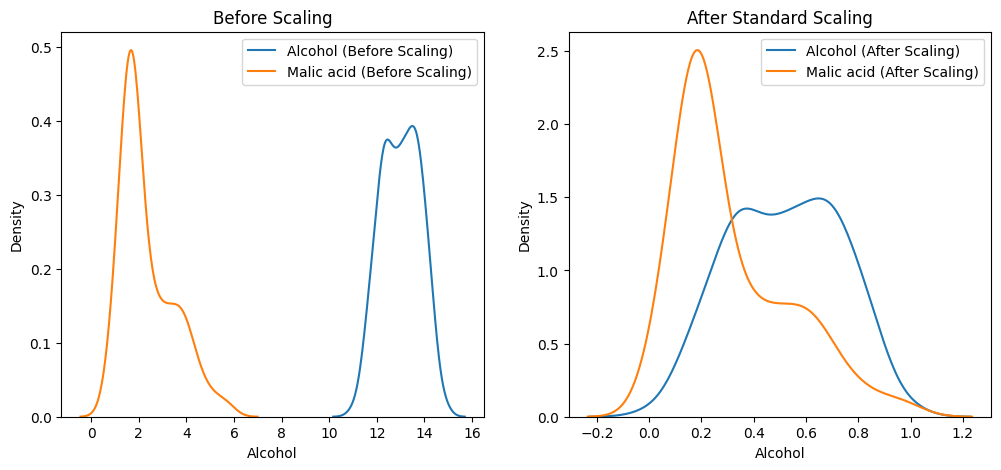

In [131]:



fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X['Alcohol'], ax=ax1, label='Alcohol (Before Scaling)')
sns.kdeplot(X['Malic acid'], ax=ax1, label='Malic acid (Before Scaling)')

# After scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_scaled['Alcohol'], ax=ax2, label='Alcohol (After Scaling)')
sns.kdeplot(X_scaled['Malic acid'], ax=ax2, label='Malic acid (After Scaling)')

# Display the legend
ax1.legend()
ax2.legend()

plt.show()